 ### Descripcion del Conjunto de Datos ’


In [1]:
import os # Proporciona funciones para interactuar con el sistema operativo.
import pandas as pd # Manipulación y análisis de datos tabulares (filas y columnas).
import numpy as np # Operaciones numéricas y matriciales.
import seaborn as sns # Visualización estadística de datos.
import matplotlib.pyplot as plt # Creación de gráficos y visualizaciones.

# Matplotlib es una herramienta versátil para crear gráficos desde cero,
# mientras que Seaborn simplifica la creación de gráficos estadísticos.

from sklearn.decomposition import PCA # Implementación del Análisis de Componentes Principales (PCA).
from sklearn.preprocessing import StandardScaler # Estandarización de datos para análisis estadísticos.


In [2]:

# Cargar 
data = sns.load_dataset("penguins")
data.head(5)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
## Cálculo de los estadísticos descriptivos.

# Genera una lista con los nombres de las variables.
variables = list(data.columns)   

In [4]:
def describe_p(data):
    descripciones = data.describe()
    
    descripciones.loc['Varianza'] = data.var()
    descripciones.loc['Coeficiente de Variación'] = data.std() / data.mean()
    descripciones.loc['Datos Perdidos'] = data.isna().sum()
    
    return descripciones

stats = describe_p(data)

C:\Users\franc\AppData\Local\Temp\ipykernel_5076\1818211907.py:4: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  descripciones.loc['Varianza'] = data.var()
C:\Users\franc\AppData\Local\Temp\ipykernel_5076\1818211907.py:5: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  descripciones.loc['Coeficiente de Variación'] = data.std() / data.mean()
C:\Users\franc\AppData\Local\Temp\ipykernel_5076\1818211907.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
stats.round(2)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.00,342.00,342.00,342.00
mean,43.92,17.15,200.92,4201.75
std,5.46,1.97,14.06,801.95
min,32.10,13.10,172.00,2700.00
25%,39.22,15.60,190.00,3550.00
50%,44.45,17.30,197.00,4050.00
75%,48.50,18.70,213.00,4750.00
max,59.60,21.50,231.00,6300.00
Varianza,29.81,3.90,197.73,643131.08
Coeficiente de Variación,0.12,0.12,0.07,0.19


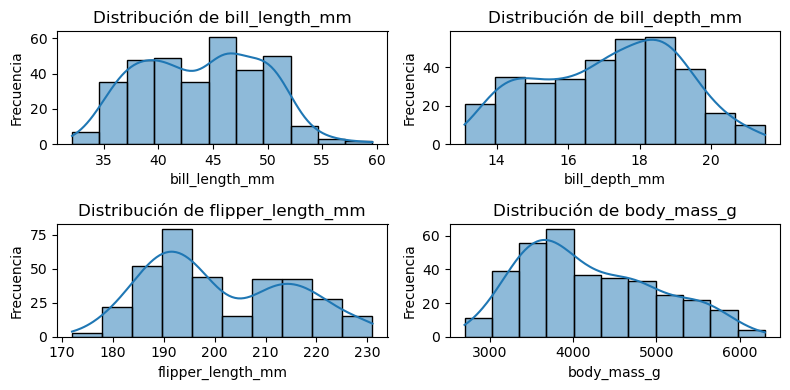

In [7]:

# Seleccionar solo las variables numéricas
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Generar gráficos de distribución para cada variable numérica
num_cols = len(numeric_data.columns)

# Calcular el número de filas necesario para mostrar dos columnas
num_rows = (num_cols + 1) // 2

# Crear subplots para mostrar gráficos de distribución en dos columnas
fig, axes = plt.subplots(num_rows, 2, figsize=(8, num_rows*2))

# Iterar sobre las columnas numéricas y crear gráficos de distribución
for i, ax in enumerate(axes.flatten()):
    if i < num_cols:
        sns.histplot(numeric_data.iloc[:, i], kde=True, ax=ax)
        ax.set_title(f'Distribución de {numeric_data.columns[i]}')
        ax.set_xlabel(numeric_data.columns[i])
        ax.set_ylabel('Frecuencia')

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

In [8]:
data.nunique()

species                3
island                 3
bill_length_mm       164
bill_depth_mm         80
flipper_length_mm     55
body_mass_g           94
sex                    2
dtype: int64

### Limpieza datos


In [9]:
# Seleccionar las columnas numéricas del DataFrame
numericas = data.select_dtypes(include=['int', 'int32', 'int64','float', 'float32', 'float64']).columns.to_list()
# Seleccionar las columnas categóricas del DataFrame
categoricas = [variable for variable in variables if variable not in numericas]

In [10]:
for x in categoricas:
    data[x] = data[x].replace('nan', np.nan) 

In [11]:
#cargamos librerias y funciones limpieza datos.
os.chdir(R'D:\UCM\Mineria')
from FuncionesMineria import (atipicosAmissing, patron_perdidos, ImputacionCuant, ImputacionCuali,analizar_variables_categoricas)

In [12]:
analizar_variables_categoricas(data)

{'species':              n         %
 Adelie     152  0.441860
 Gentoo     124  0.360465
 Chinstrap   68  0.197674,
 'island':              n         %
 Biscoe     168  0.488372
 Dream      124  0.360465
 Torgersen   52  0.151163,
 'sex':           n         %
 Male    168  0.504505
 Female  165  0.495495}

In [13]:
# La proporción de valores atípicos se calcula dividiendo la cantidad de valores atípicos por el número total de filas
resultados = {x: atipicosAmissing(data[x])[1] / len(data) for x in numericas}

# Modifico los atipicos como missings
for x in numericas:
    data[x] = atipicosAmissing(data[x])[0]
resultados

{'bill_length_mm': 0.0,
 'bill_depth_mm': 0.0,
 'flipper_length_mm': 0.0,
 'body_mass_g': 0.0}

In [14]:
prop_missingsVars = data.isna().sum()/len(data)
prop_missingsVars

species              0.000000
island               0.000000
bill_length_mm       0.005814
bill_depth_mm        0.005814
flipper_length_mm    0.005814
body_mass_g          0.005814
sex                  0.031977
dtype: float64

In [15]:
# Creamos la variable prop_missings que recoge el número de valores perdidos por cada observación
data['prop_missings'] = data.isna().mean(axis = 1)
# Realizamos un estudio descriptivo básico a la nueva variable
data['prop_missings'].describe()


count    344.000000
mean       0.007890
std        0.058720
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.714286
Name: prop_missings, dtype: float64

In [16]:
# Elimino las observaciones con datos missings
eliminar = data['prop_missings'] > 0.50
datos = data[~eliminar]
data['prop_missings'].value_counts()

0.000000    333
0.142857      9
0.714286      2
Name: prop_missings, dtype: int64

In [17]:
# Transformo la nueva variable en categórica (ya que tiene pocos valores diferentes)
data["prop_missings"] = data["prop_missings"].astype(str)
# Elimino las variables con mas de la mitad de datos missings (no hay ninguna)
eliminar = [prop_missingsVars.index[x] for x in range(len(prop_missingsVars)) if prop_missingsVars[x] > 0.5]
data = datos.drop(eliminar, axis = 1)

In [18]:
#IMPUTACION
for x in categoricas:
    data[x] = ImputacionCuali(data[x],'aleatorio')

In [19]:
data.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
prop_missings        0
dtype: int64

In [20]:
datos.drop('prop_missings', axis=1, inplace=True)
data.drop('prop_missings', axis=1, inplace=True)

In [21]:
datos.columns


Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

### Graficos explicativos


In [22]:
stats = describe_p(data)
stats.round(2)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.00,342.00,342.00,342.00
mean,43.92,17.15,200.92,4201.75
std,5.46,1.97,14.06,801.95
min,32.10,13.10,172.00,2700.00
25%,39.22,15.60,190.00,3550.00
50%,44.45,17.30,197.00,4050.00
75%,48.50,18.70,213.00,4750.00
max,59.60,21.50,231.00,6300.00
Varianza,29.81,3.90,197.73,643131.08
Coeficiente de Variación,0.12,0.12,0.07,0.19


<Axes: xlabel='flipper_length_mm', ylabel='bill_length_mm'>

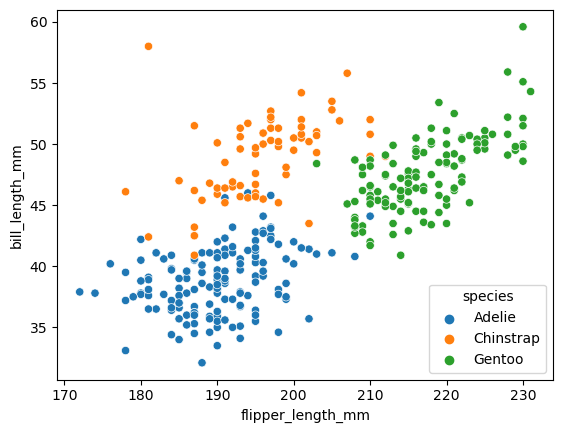

In [23]:
import seaborn as sns

sns.scatterplot(x = "flipper_length_mm", y = "bill_length_mm", hue = "species",
                data = datos)

<Axes: xlabel='body_mass_g', ylabel='bill_length_mm'>

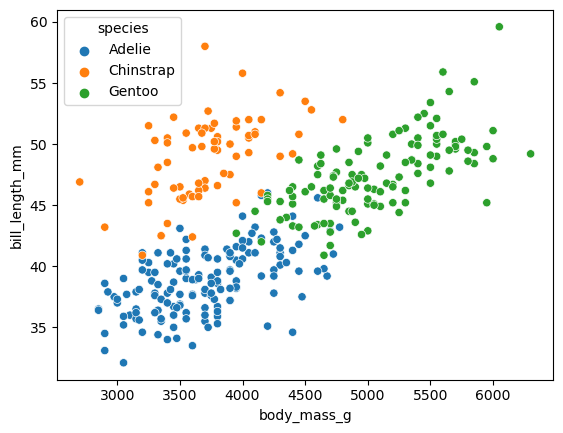

In [24]:
import seaborn as sns

sns.scatterplot(x = "body_mass_g", y = "bill_length_mm", hue = "species",
                data = datos)

<Axes: xlabel='bill_depth_mm', ylabel='body_mass_g'>

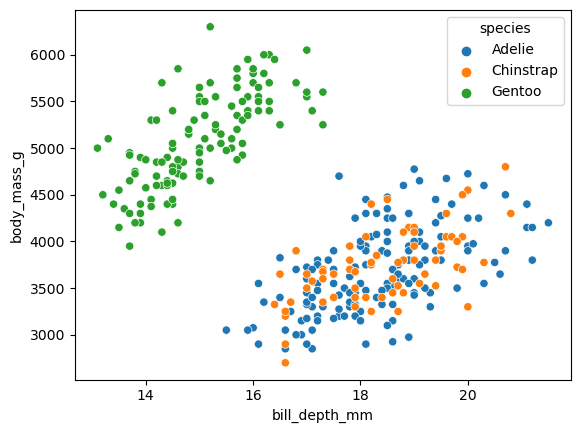

In [25]:
import seaborn as sns

sns.scatterplot(x = "bill_depth_mm", y = "body_mass_g", hue = "species",
                data = datos)

## Matriz correlacion


                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.235053           0.656181   
bill_depth_mm           -0.235053       1.000000          -0.583851   
flipper_length_mm        0.656181      -0.583851           1.000000   
body_mass_g              0.595110      -0.471916           0.871202   

                   body_mass_g  
bill_length_mm        0.595110  
bill_depth_mm        -0.471916  
flipper_length_mm     0.871202  
body_mass_g           1.000000  


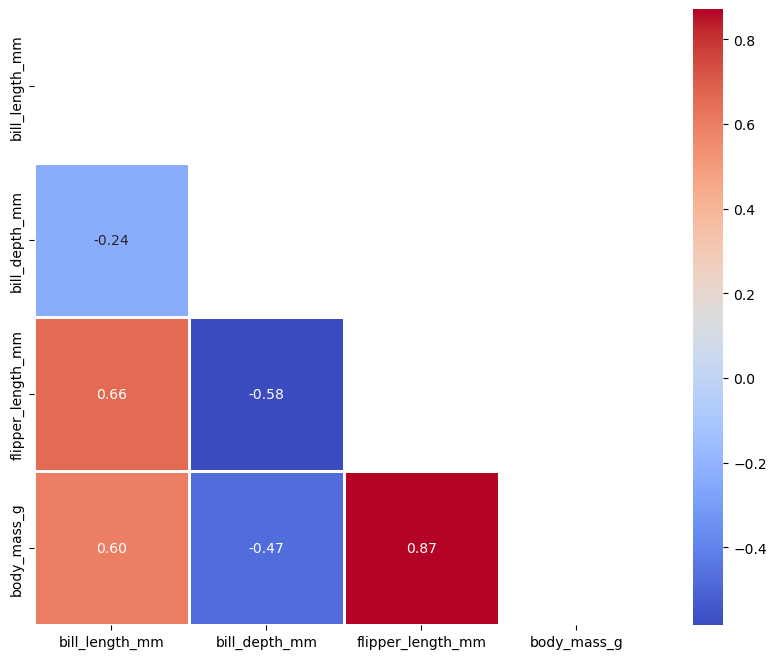

In [26]:

# Calcula y representación de la matriz de correlación entre las 
# variables del DataFrame 'notas'.
R = data.corr()
mask = np.triu(np.ones_like(R, dtype=bool))
# Crea una nueva figura de tamaño 10x8 pulgadas para el gráfico.
plt.figure(figsize=(10, 8))

# Genera un mapa de calor (heatmap) de la matriz de correlación 'R' utilizando Seaborn.
# 'annot=True' agrega los valores de correlación en las celdas.
# 'cmap' establece el esquema de colores (en este caso, 'coolwarm' para colores fríos y cálidos).
# 'fmt' controla el formato de los números en las celdas ('.2f' para dos decimales).
# 'linewidths' establece el ancho de las líneas que separan las celdas.
sns.heatmap(R, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.9, mask=mask)
print(R)

## PCA

In [27]:
# Estandarizamos los datos:
# Utilizamos StandardScaler() para estandarizar (normalizar) las variables.
# - StandardScaler calcula la media y la desviación estándar de las variables en 'notas' durante el ajuste.
# - Luego, utiliza estos valores para transformar 'notas' de manera que tengan media 0 y desviación estándar 1.
# - El método fit_transform() realiza ambas etapas de ajuste y transformación en una sola llamada.
# Finalmente, convertimos la salida en un DataFrame usando pd.DataFrame().
data_standarizada = pd.DataFrame(
    StandardScaler().fit_transform(data[numericas]),  # Datos estandarizados
    columns=['{}_z'.format(numericas) for numericas in numericas],  # Nombres de columnas estandarizadas
    index=data[numericas].index  # Índices (etiquetas de filas) del DataFrame
)

In [28]:
data_standarizada

,bill_length_mm_z,bill_depth_mm_z,flipper_length_mm_z,body_mass_g_z
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532
4,-1.324737,1.089724,-0.563715,-0.938776
5,-0.847812,1.748985,-0.777373,-0.689020
...,...,...,...,...
338,0.601305,-1.750171,0.931890,0.903175
340,0.527932,-1.445897,1.003109,0.809516
341,1.188289,-0.735923,1.501644,1.933419
342,0.234440,-1.192335,0.789451,1.246590


In [29]:
# Crea una instancia de Análisis de Componentes Principales (ACP):
#4 componentes 
pca = PCA(n_components=4)

# Aplicamos el Análisis de Componentes Principales (ACP) a los datos estandarizados:
fit = pca.fit(data_standarizada)
# Obtener los autovalores asociados a cada componente principal.
autovalores = fit.explained_variance_
autovalores

array([2.76183065, 0.7747822 , 0.36630698, 0.10881037])

In [30]:
pca

PCA(n_components=4)

In [31]:
# Obtener la varianza explicada por cada componente principal como un porcentaje de la varianza total.
var_explicada = fit.explained_variance_ratio_*100
var_explicada

array([68.8438781 , 19.31291885,  9.13089766,  2.7123054 ])

In [32]:
# Calcular la varianza explicada acumulada a medida que se agregan cada componente principal.
var_acumulada = np.cumsum(var_explicada)
var_acumulada

array([ 68.8438781 ,  88.15679694,  97.2876946 , 100.        ])

In [33]:
# Crear un DataFrame de pandas con los datos anteriores y establecer índice.
datas = {'Autovalores': autovalores, 'Variabilidad Explicada': var_explicada, 'Variabilidad Acumulada': var_acumulada}
tabla = pd.DataFrame(datas, index=['Componente {}'.format(i) for i in range(1, fit.n_components_+1)]) 

# Imprimir la tabla
print(tabla)

              Autovalores  Variabilidad Explicada  Variabilidad Acumulada
Componente 1     2.761831               68.843878               68.843878
Componente 2     0.774782               19.312919               88.156797
Componente 3     0.366307                9.130898               97.287695
Componente 4     0.108810                2.712305              100.000000


In [34]:
resultados_pca = pd.DataFrame(fit.transform(data_standarizada), 
                              columns=['Componente {}'.format(i) for i in range(1, fit.n_components_+1)],
                              index=data_standarizada.index)

              Autovalores  Variabilidad Explicada  Variabilidad Acumulada
Componente 1     2.761831               68.843878               68.843878
Componente 2     0.774782               19.312919               88.156797
Componente 3     0.366307                9.130898               97.287695
Componente 4     0.108810                2.712305              100.000000


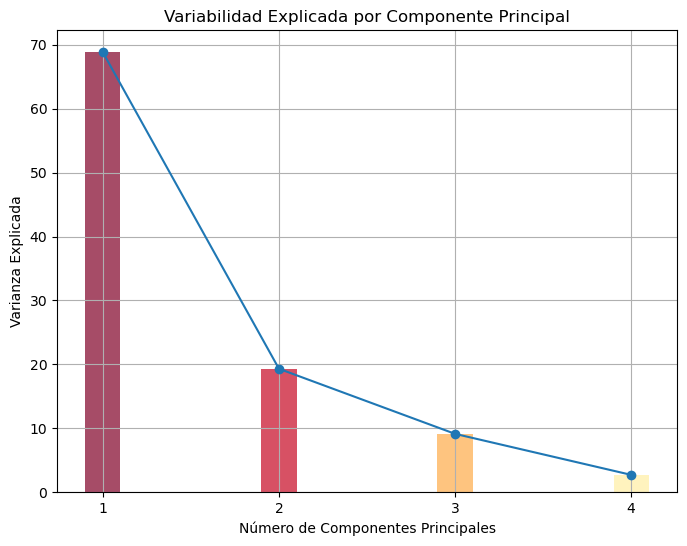

In [35]:

def plot_varianza_explicada(var_explicada, n_components):
    """
    Representa la variabilidad explicada 
    Args:
      var_explicada (array): Un array que contiene el porcentaje de varianza explicada
        por cada componente principal. Generalmente calculado como
        var_explicada = fit.explained_variance_ratio_ * 100.
      n_components (int): El número total de componentes principales.
        Generalmente calculado como fit.n_components.
    """  
    # Crear un rango de números de componentes principales de 1 a n_components
    num_componentes_range = np.arange(1, n_components + 1)

    # Crear una figura de tamaño 8x6
    plt.figure(figsize=(8, 6))

    # Trazar la varianza explicada en función del número de componentes principales
    plt.plot(num_componentes_range, var_explicada, marker='o')
    colores = plt.cm.YlOrRd(var_explicada / max(var_explicada)*3)
    # Etiquetas de los ejes x e y
    plt.xlabel('Número de Componentes Principales')
    plt.ylabel('Varianza Explicada')

    # Título del gráfico
    plt.title('Variabilidad Explicada por Componente Principal')

    # Establecer las marcas en el eje x para que coincidan con el número de componentes
    plt.xticks(num_componentes_range)

    # Mostrar una cuadrícula en el gráfico
    plt.grid(True)

    # Agregar barras debajo de cada punto para representar el porcentaje de variabilidad explicada
    # - 'width': Ancho de las barras de la barra. En este caso, se establece en 0.2 unidades.
    # - 'align': Alineación de las barras con respecto a los puntos en el eje x. 
    #   'center' significa que las barras estarán centradas debajo de los puntos.
    # - 'alpha': Transparencia de las barras. Un valor de 0.7 significa que las barras son 70% transparentes.
    plt.bar(num_componentes_range, var_explicada, width=0.2, align='center', alpha=0.7, color=colores)

    # Mostrar el gráfico
    plt.show()
print(tabla)
plot_varianza_explicada(var_explicada, fit.n_components_)

In [ ]:
# Crea una instancia de Análisis de Componentes Principales (ACP):
#2 componentes 
pca = PCA(n_components=2)

# Aplicamos el Análisis de Componentes Principales (ACP) a los datos estandarizados:
fit = pca.fit(data_standarizada)
# Obtener los autovalores asociados a cada componente principal.
autovalores = fit.explained_variance_
autovalores
var_explicada = fit.explained_variance_ratio_*100
var_explicada
# Calcular la varianza explicada acumulada a medida que se agregan cada componente principal.
var_acumulada = np.cumsum(var_explicada)
var_acumulada
# Obtener los autovalores asociados a cada componente principal.
autovalores = fit.explained_variance_

# Obtener los autovectores asociados a cada componente principal y transponerlos.
autovectores = pd.DataFrame(pca.components_.T, 
                            columns = ['Autovector {}'.format(i) for i in range(1, fit.n_components_+1)],
                            index = ['{}_z'.format(variable) for variable in numericas])

# Calculamos las dos primeras componentes principales
resultados_pca = pd.DataFrame(fit.transform(data_standarizada), 
                              columns=['Componente {}'.format(i) for i in range(1, fit.n_components_+1)],
                              index=data_standarizada.index)

# Añadimos las componentes principales a la base de datos estandarizada.
data_z_cp = pd.concat([data_standarizada, resultados_pca], axis=1)

## 2 Componentes principales

In [36]:
# Crea una instancia de Análisis de Componentes Principales (ACP):
#2 componentes 
pca = PCA(n_components=2)

# Aplicamos el Análisis de Componentes Principales (ACP) a los datos estandarizados:
fit = pca.fit(data_standarizada)
# Obtener los autovalores asociados a cada componente principal.
autovalores = fit.explained_variance_
autovalores

# Cálculo de las correlaciones entre las variables originales y las componentes seleccionadas.
# Guardamos el nombre de las variables del archivo conjunto (variables y componentes).
variables_cp = data_z_cp.columns

correlacion = pd.DataFrame(np.corrcoef(data_standarizada.T, resultados_pca.T), 
                           index = variables_cp, columns = variables_cp)

n_variables = fit.n_features_in_
correlaciones_data_con_cp = correlacion.iloc[:fit.n_features_in_, fit.n_features_in_:]
#####################################################################################################
def plot_cos2_heatmap(cosenos2):
    """
    Genera un mapa de calor (heatmap) de los cuadrados de las cargas en las Componentes Principales (cosenos al cuadrado).

    Args:
        cosenos2 (pd.DataFrame): DataFrame de los cosenos al cuadrado, donde las filas representan las variables y las columnas las Componentes Principales.

    """
    # Crea una figura de tamaño 8x8 pulgadas para el gráfico
    plt.figure(figsize=(8, 8))

    # Utiliza un mapa de calor (heatmap) para visualizar 'cos2' con un solo color
    sns.heatmap(cosenos2, cmap='Greens', linewidths=0.5, annot=False)

    # Etiqueta los ejes (puedes personalizar los nombres de las filas y columnas si es necesario)
    plt.xlabel('Componentes Principales')
    plt.ylabel('Variables')

    # Establece el título del gráfico
    plt.title('Cuadrados de las Cargas en las Componentes Principales')

    # Muestra el gráfico
    plt.show()

cos2 = correlaciones_data_con_cp **2
print(cos2)

array([2.76183065, 0.7747822 ])

In [37]:
var_explicada = fit.explained_variance_ratio_*100
var_explicada

array([68.8438781 , 19.31291885])

In [38]:
# Calcular la varianza explicada acumulada a medida que se agregan cada componente principal.
var_acumulada = np.cumsum(var_explicada)
var_acumulada


array([68.8438781 , 88.15679694])

In [39]:
# Obtener los autovalores asociados a cada componente principal.
autovalores = fit.explained_variance_

# Obtener los autovectores asociados a cada componente principal y transponerlos.
autovectores = pd.DataFrame(pca.components_.T, 
                            columns = ['Autovector {}'.format(i) for i in range(1, fit.n_components_+1)],
                            index = ['{}_z'.format(variable) for variable in numericas])

# Calculamos las dos primeras componentes principales
resultados_pca = pd.DataFrame(fit.transform(data_standarizada), 
                              columns=['Componente {}'.format(i) for i in range(1, fit.n_components_+1)],
                              index=data_standarizada.index)

# Añadimos las componentes principales a la base de datos estandarizada.
data_z_cp = pd.concat([data_standarizada, resultados_pca], axis=1)

In [40]:

# Cálculo de las correlaciones entre las variables originales y las componentes seleccionadas.
# Guardamos el nombre de las variables del archivo conjunto (variables y componentes).
variables_cp = data_z_cp.columns

correlacion = pd.DataFrame(np.corrcoef(data_standarizada.T, resultados_pca.T), 
                           index = variables_cp, columns = variables_cp)

n_variables = fit.n_features_in_
correlaciones_data_con_cp = correlacion.iloc[:fit.n_features_in_, fit.n_features_in_:]



                     Componente 1  Componente 2
bill_length_mm_z         0.570724      0.275361
bill_depth_mm_z          0.441338      0.491654
flipper_length_mm_z      0.913672      0.000004
body_mass_g_z            0.828021      0.005498


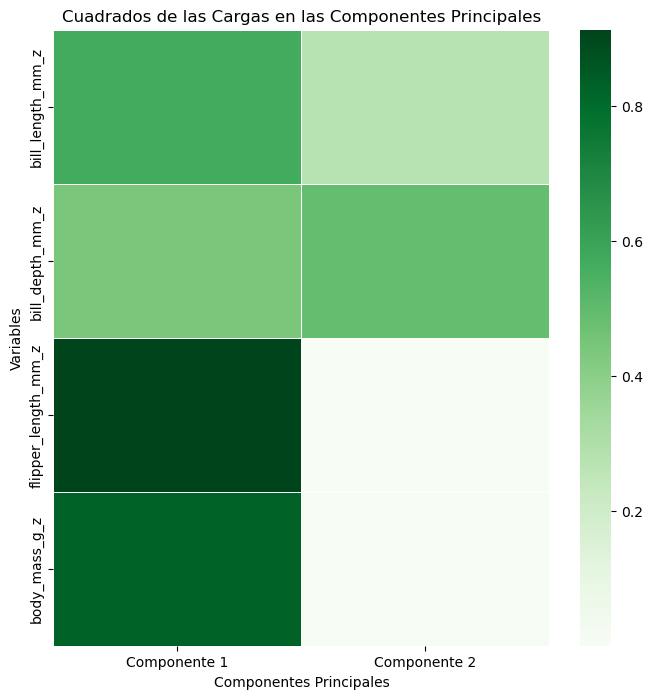

In [41]:
#####################################################################################################
def plot_cos2_heatmap(cosenos2):
    """
    Genera un mapa de calor (heatmap) de los cuadrados de las cargas en las Componentes Principales (cosenos al cuadrado).

    Args:
        cosenos2 (pd.DataFrame): DataFrame de los cosenos al cuadrado, donde las filas representan las variables y las columnas las Componentes Principales.

    """
    # Crea una figura de tamaño 8x8 pulgadas para el gráfico
    plt.figure(figsize=(8, 8))

    # Utiliza un mapa de calor (heatmap) para visualizar 'cos2' con un solo color
    sns.heatmap(cosenos2, cmap='Greens', linewidths=0.5, annot=False)

    # Etiqueta los ejes (puedes personalizar los nombres de las filas y columnas si es necesario)
    plt.xlabel('Componentes Principales')
    plt.ylabel('Variables')

    # Establece el título del gráfico
    plt.title('Cuadrados de las Cargas en las Componentes Principales')

    # Muestra el gráfico
    plt.show()

cos2 = correlaciones_data_con_cp **2
print(cos2)
plot_cos2_heatmap(cos2)

                     Componente 1  Componente 2
bill_length_mm_z         0.755463      0.524748
bill_depth_mm_z         -0.664333      0.701180
flipper_length_mm_z      0.955862      0.002006
body_mass_g_z            0.909957      0.074149


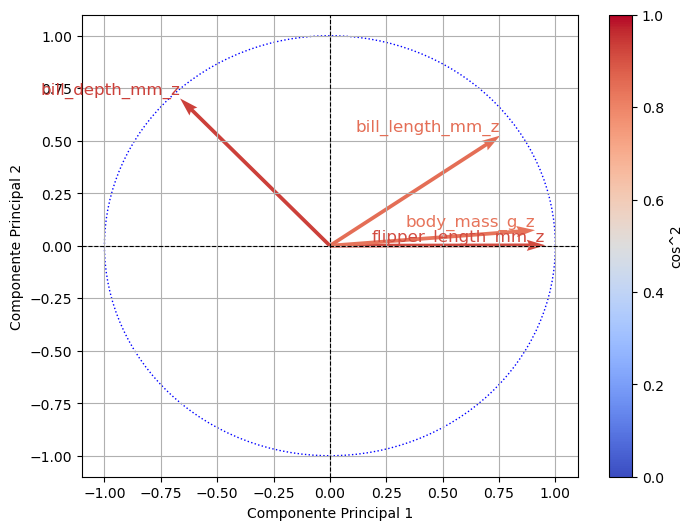

In [96]:
        
def plot_corr_cos(n_components, correlaciones_datos_con_cp):
    """
    Genera un gráficos en los que se representa un vector por cada variable, usando como ejes las componentes, la orientación
    y la longitud del vector representa la correlación entre cada variable y dos de las componentes. El color representa el
    valor de la suma de los cosenos al cuadrado.

    Args:
        n_components (int): Número entero que representa el número de componentes principales seleccionadas.
        correlaciones_datos_con_cp (DataFrame): DataFrame que contiene la matriz de correlaciones entre variables y componentes
    """
    # Definir un mapa de color (cmap) sensible a las diferencias numéricas

    cmap = plt.get_cmap('coolwarm')  # Puedes ajustar el cmap según tus preferencias


    for i in range(n_components):
        for j in range(i + 1, n_components):  # Evitar pares duplicados
            # Calcular la suma de los cosenos al cuadrado
            sum_cos2 = correlaciones_datos_con_cp.iloc[:, i] ** 2 + correlaciones_datos_con_cp.iloc[:, j] ** 2

            # Crear un nuevo gráfico para cada par de componentes principales
            plt.figure(figsize=(8, 6))

            # Dibujar un círculo de radio 1
            circle = plt.Circle((0, 0), 1, fill=False, color='b', linestyle='dotted')

            plt.gca().add_patch(circle)

            # Dibujar vectores para cada variable con colores basados en la suma de los cosenos al cuadrado
            for k, var_name in enumerate(correlaciones_datos_con_cp.index):
                x = correlaciones_datos_con_cp.iloc[k, i]  # Correlación en la primera dimensión
                y = correlaciones_datos_con_cp.iloc[k, j]  # Correlación en la segunda dimensión

                # Seleccionar un color de acuerdo a la suma de los cosenos al cuadrado
                color = cmap(sum_cos2[k])

                # Dibujar el vector con el color seleccionado
                plt.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=1, color=color)

                # Agregar el nombre de la variable junto a la flecha con el mismo color
                plt.text(x, y, var_name, color=color, fontsize=12, ha='right', va='bottom')

            # Dibujar líneas discontinuas que representen los ejes
            plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
            plt.axvline(0, color='black', linestyle='--', linewidth=0.8)

            # Etiquetar los ejes
            plt.xlabel(f'Componente Principal {i + 1}')
            plt.ylabel(f'Componente Principal {j + 1}')

            # Establecer los límites del gráfico
            plt.xlim(-1.1, 1.1)
            plt.ylim(-1.1, 1.1)

            # Agregar un mapa de color (colorbar) y su leyenda
            sm = plt.cm.ScalarMappable(cmap=cmap)
            sm.set_array([])  # Evita errores de escala
            plt.colorbar(mappable=sm, orientation='vertical', label='cos^2')  # Agrega la leyenda
            # Mostrar el gráfico
            plt.grid()
            plt.show()
print(correlaciones_data_con_cp)
plot_corr_cos(fit.n_components, correlaciones_data_con_cp)

bill_length_mm_z       0.846084
bill_depth_mm_z        0.932992
flipper_length_mm_z    0.913676
body_mass_g_z          0.833519
dtype: float64


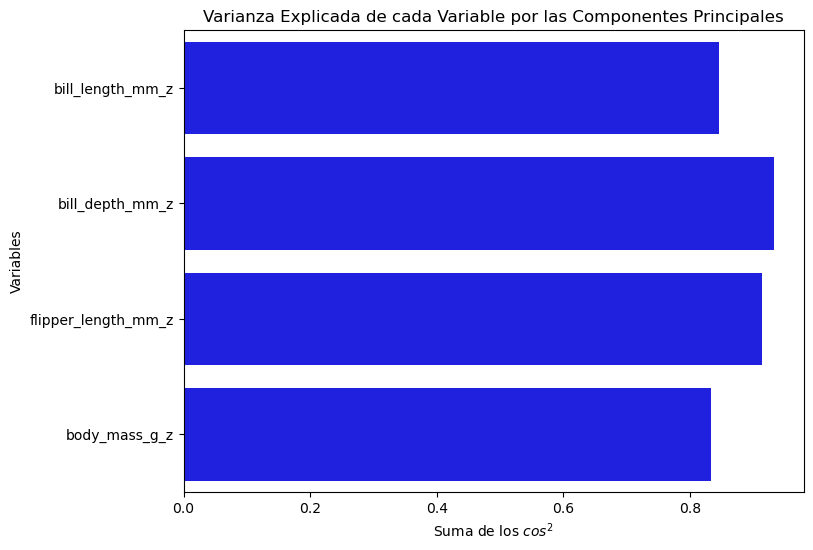

                     Componente 1  Componente 2
bill_length_mm_z         0.570724      0.275361
bill_depth_mm_z          0.441338      0.491654
flipper_length_mm_z      0.913672      0.000004
body_mass_g_z            0.828021      0.005498


In [253]:

def plot_cos2_bars(cos2):
    """
    Genera un gráfico de barras para representar la varianza explicada de cada variable utilizando los cuadrados de las cargas (cos^2).

    Args:
        cos2 (pd.DataFrame): DataFrame que contiene los cuadrados de las cargas de las variables en las componentes principales.

    Returns:
        None
    """
    # Crea una figura de tamaño 8x6 pulgadas para el gráfico
    plt.figure(figsize=(8, 6))

    # Crea un gráfico de barras para representar la varianza explicada por cada variable
    sns.barplot(x=cos2.sum(axis=1), y=cos2.index, color="blue")
    print(cos2.sum(axis=1))
    # Etiqueta los ejes
    plt.xlabel('Suma de los $cos^2$')
    plt.ylabel('Variables')

    # Establece el título del gráfico
    plt.title('Varianza Explicada de cada Variable por las Componentes Principales')

    # Muestra el gráfico
    plt.show()
    

plot_cos2_bars(cos2)
print(cos2)

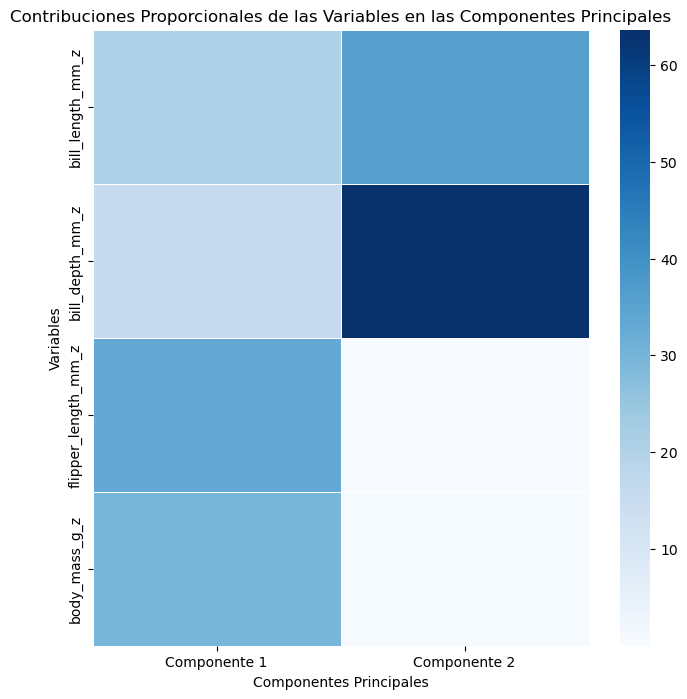

                     Componente 1  Componente 2
bill_length_mm_z        20.725286     35.644619
bill_depth_mm_z         16.026786     63.643150
flipper_length_mm_z     33.179135      0.000521
body_mass_g_z           30.068793      0.711710


In [44]:
def plot_contribuciones_proporcionales(cos2, autovalores, n_components):
    """
    Cacula las contribuciones de cada variable a las componentes principales y
    Genera un gráfico de mapa de calor con los datos
    Args:
        cos2 (DataFrame): DataFrame de los cuadrados de las cargas (cos^2).
        autovalores (array): Array de los autovalores asociados a las componentes principales.
        n_components (int): Número de componentes principales seleccionadas.
    """
    # Calcula las contribuciones multiplicando cos2 por la raíz cuadrada de los autovalores
    contribuciones = cos2 * np.sqrt(autovalores)

    # Inicializa una lista para las sumas de contribuciones
    sumas_contribuciones = []

    # Calcula la suma de las contribuciones para cada componente principal
    for i in range(n_components):
        nombre_componente = f'Componente {i + 1}'
        suma_contribucion = np.sum(contribuciones[nombre_componente])
        sumas_contribuciones.append(suma_contribucion)

    # Calcula las contribuciones proporcionales dividiendo por las sumas de contribuciones
    contribuciones_proporcionales = contribuciones.div(sumas_contribuciones, axis=1) * 100

    # Crea una figura de tamaño 8x8 pulgadas para el gráfico
    plt.figure(figsize=(8, 8))

    # Utiliza un mapa de calor (heatmap) para visualizar las contribuciones proporcionales
    sns.heatmap(contribuciones_proporcionales, cmap='Blues', linewidths=0.5, annot=False)

    # Etiqueta los ejes (puedes personalizar los nombres de las filas y columnas si es necesario)
    plt.xlabel('Componentes Principales')
    plt.ylabel('Variables')

    # Establece el título del gráfico
    plt.title('Contribuciones Proporcionales de las Variables en las Componentes Principales')

    # Muestra el gráfico
    plt.show()
    
    # Devuelve los DataFrames de contribuciones y contribuciones proporcionales
    return contribuciones_proporcionales

contribuciones_proporcionales = plot_contribuciones_proporcionales(cos2,autovalores,fit.n_components)
print(contribuciones_proporcionales)

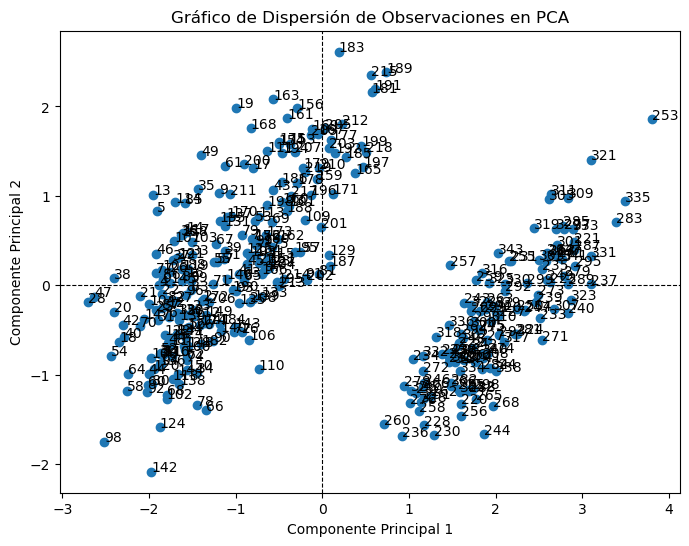

In [45]:
def plot_pca_scatter(pca, datos_estandarizados, n_components):
    """
    Genera gráficos de dispersión de observaciones en pares de componentes principales seleccionados.

    Args:
        pca (PCA): Objeto PCA previamente ajustado.
        datos_estandarizados (pd.DataFrame): DataFrame de datos estandarizados.
        n_components (int): Número de componentes principales seleccionadas.
    """
    # Representamos las observaciones en cada par de componentes seleccionadas
    componentes_principales = pca.transform(datos_estandarizados)
    
    for i in range(n_components):
        for j in range(i + 1, n_components):  # Evitar pares duplicados
            # Calcular la suma de los valores al cuadrado para cada variable
            # Crea un gráfico de dispersión de las observaciones en las dos primeras componentes principales
            plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura si es necesario
            plt.scatter(componentes_principales[:, i], componentes_principales[:, j])
            
            # Añade etiquetas a las observaciones
            etiquetas_de_observaciones = list(datos_estandarizados.index)
    
            for k, label in enumerate(etiquetas_de_observaciones):
                plt.annotate(label, (componentes_principales[k, i], componentes_principales[k, j]))
            
            # Dibujar líneas discontinuas que representen los ejes
            plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
            plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
            
            # Etiquetar los ejes
            plt.xlabel(f'Componente Principal {i + 1}')
            plt.ylabel(f'Componente Principal {j + 1}')
            
            # Establece el título del gráfico
            plt.title('Gráfico de Dispersión de Observaciones en PCA')
            
            plt.show()
            
plot_pca_scatter(pca, data_standarizada, fit.n_components)
################################################################################

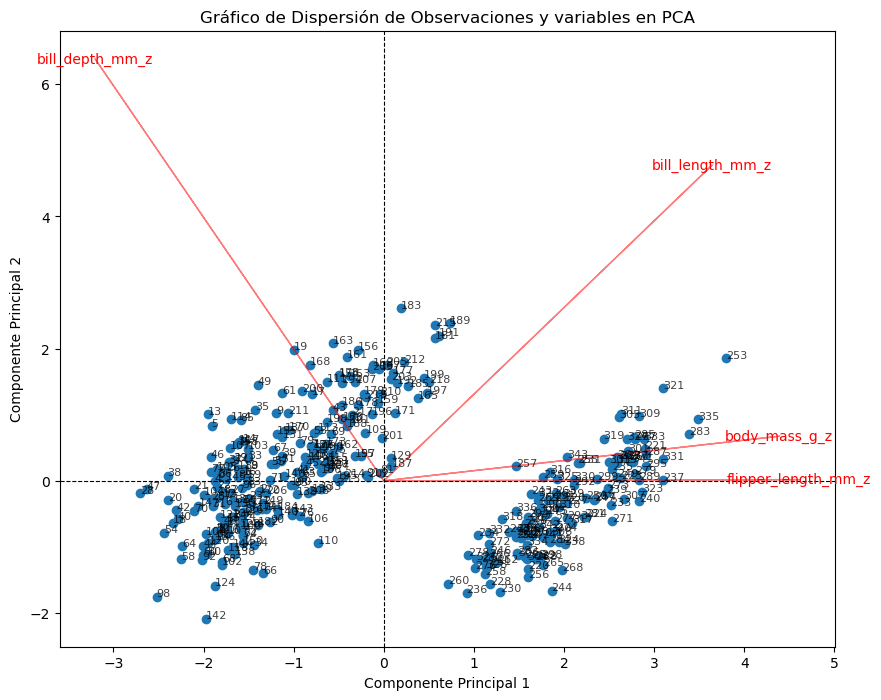

In [46]:
def plot_pca_scatter_with_vectors(pca, datos_estandarizados, n_components, components_):
    """
    Genera gráficos de dispersión de observaciones en pares de componentes principales seleccionados
    con vectores de las correlaciones escaladas entre variables y componentes

    Args:
        pca (PCA): Objeto PCA previamente ajustado.
        datos_estandarizados (pd.DataFrame): DataFrame de datos estandarizados.
        n_components (int): Número de componentes principales seleccionadas.
        components_: Array con las componentes.
    """
    # Representamos las observaciones en cada par de componentes seleccionadas
    componentes_principales = pca.transform(datos_estandarizados)
    
    for i in range(n_components):
        for j in range(i + 1, n_components):  # Evitar pares duplicados
            # Calcular la suma de los valores al cuadrado para cada variable
            # Crea un gráfico de dispersión de las observaciones en las dos primeras componentes principales
            plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura si es necesario
            plt.scatter(componentes_principales[:, i], componentes_principales[:, j])
            
            # Añade etiquetas a las observaciones
            etiquetas_de_observaciones = list(datos_estandarizados.index)
    
            for k, label in enumerate(etiquetas_de_observaciones):
                plt.annotate(label, (componentes_principales[k, i], componentes_principales[k, j]),fontsize=8,alpha=0.75)
            
            # Dibujar líneas discontinuas que representen los ejes
            plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
            plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
            
            # Etiquetar los ejes
            plt.xlabel(f'Componente Principal {i + 1}')
            plt.ylabel(f'Componente Principal {j + 1}')
            
            # Establece el título del gráfico
            plt.title('Gráfico de Dispersión de Observaciones y variables en PCA')
            
            
            # Añadimos vectores que representen las correlaciones escaladas entre variables y componentes
            fit = pca.fit(datos_estandarizados)
            coeff = np.transpose(fit.components_)
            scaled_coeff = 8 * coeff  #8 = escalado utilizado, ajustar en función del ejemplo
            for var_idx in range(scaled_coeff.shape[0]):
                plt.arrow(0, 0, scaled_coeff[var_idx, i], scaled_coeff[var_idx, j], color='red', alpha=0.5)
                plt.text(scaled_coeff[var_idx, i], scaled_coeff[var_idx, j],
                     data_standarizada.columns[var_idx], color='red', ha='center', va='center')
            
            plt.show()
            
plot_pca_scatter_with_vectors(pca, data_standarizada, fit.n_components, fit.components_)


In [47]:
#Incorporamos la variable categ ´o rica " EXTRA_ESC " en los datos
data_componentes_sup = pd.concat([ data_standarizada , resultados_pca ] , axis =1)
componentes_principales = pca.transform(data_standarizada)

In [48]:
data_standarizada

,bill_length_mm_z,bill_depth_mm_z,flipper_length_mm_z,body_mass_g_z
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532
4,-1.324737,1.089724,-0.563715,-0.938776
5,-0.847812,1.748985,-0.777373,-0.689020
...,...,...,...,...
338,0.601305,-1.750171,0.931890,0.903175
340,0.527932,-1.445897,1.003109,0.809516
341,1.188289,-0.735923,1.501644,1.933419
342,0.234440,-1.192335,0.789451,1.246590


In [114]:
data_standarizada

,bill_length_mm_z,bill_depth_mm_z,flipper_length_mm_z,body_mass_g_z,NCluster
0,-0.884499,0.785449,-1.418347,-0.564142,1
1,-0.811126,0.126188,-1.062250,-0.501703,0
2,-0.664380,0.430462,-0.421277,-1.188532,0
4,-1.324737,1.089724,-0.563715,-0.938776,1
5,-0.847812,1.748985,-0.777373,-0.689020,1
...,...,...,...,...,...
338,0.601305,-1.750171,0.931890,0.903175,2
340,0.527932,-1.445897,1.003109,0.809516,2
341,1.188289,-0.735923,1.501644,1.933419,2
342,0.234440,-1.192335,0.789451,1.246590,3


In [111]:
maximos = data_standarizada.max()
print(maximos)

bill_length_mm_z       2.875868
bill_depth_mm_z        2.205397
flipper_length_mm_z    2.142618
body_mass_g_z          2.620248
NCluster               3.000000
dtype: float64


In [49]:
data_componentes_sup


,bill_length_mm_z,bill_depth_mm_z,flipper_length_mm_z,body_mass_g_z,Componente 1,Componente 2
0,-0.884499,0.785449,-1.418347,-0.564142,-1.843445,0.047702
1,-0.811126,0.126188,-1.062250,-0.501703,-1.306762,-0.428348
2,-0.664380,0.430462,-0.421277,-1.188532,-1.369181,-0.154476
4,-1.324737,1.089724,-0.563715,-0.938776,-1.878827,-0.002048
5,-0.847812,1.748985,-0.777373,-0.689020,-1.911748,0.829210
...,...,...,...,...,...,...
338,0.601305,-1.750171,0.931890,0.903175,2.006436,-0.958909
340,0.527932,-1.445897,1.003109,0.809516,1.840886,-0.767714
341,1.188289,-0.735923,1.501644,1.933419,2.760742,0.288886
342,0.234440,-1.192335,0.789451,1.246590,1.722364,-0.704269


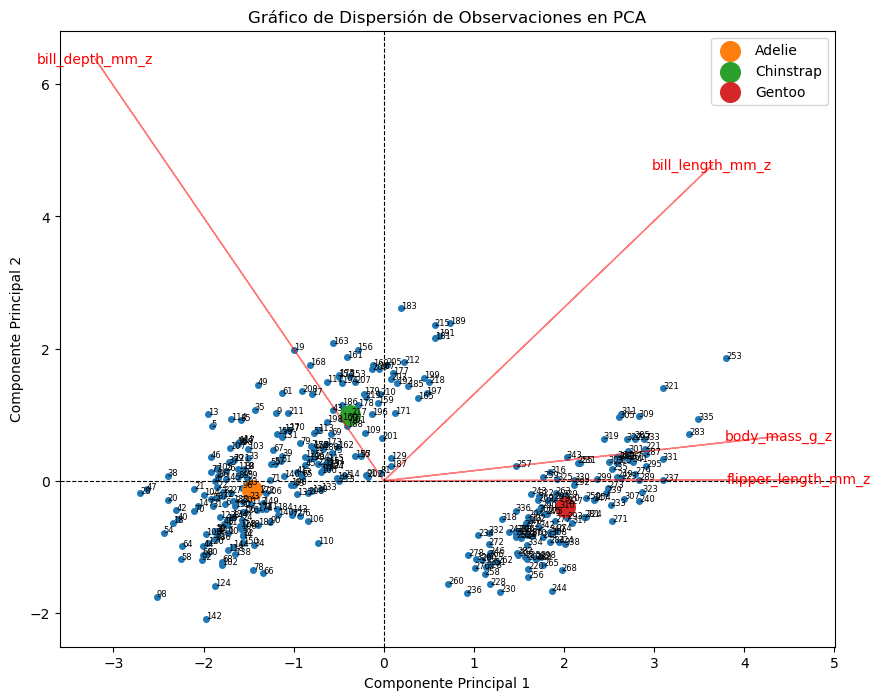

In [50]:
import matplotlib.pyplot as plt
import numpy as np

def plot_pca_scatter_with_categories(datos_estandarizados, 
                                     datos_componentes_sup_var,
                                     componentes_principales_sup, 
                                     n_components):
    # Obtener las categorías únicas
    categorias = datos_componentes_sup_var["species"].unique()  # Modificar el nombre de la variable categórica

    for i in range(n_components):
        for j in range(i + 1, n_components):  # Evitar pares duplicados
            # Crear un gráfico de dispersión de las observaciones en las dos primeras componentes principales
            plt.figure(figsize=(10, 8))  # Ajustar la dimensión de la figura si es necesario
            plt.scatter(componentes_principales_sup[:, i], componentes_principales_sup[:, j],s=16)

            for categoria in categorias:
                # Filtrar las observaciones por categoría
                observaciones_categoria = componentes_principales_sup[datos_componentes_sup_var["species"] == categoria]
                # Calcular el centroide de la categoría
                centroide = np.mean(observaciones_categoria, axis=0)
                plt.scatter(centroide[i], centroide[j], label=categoria, s=200, marker='o')

            # Mostrar etiquetas a las observaciones
            etiquetas_de_observaciones = list(datos_componentes_sup_var.index)
            for k, label in enumerate(etiquetas_de_observaciones):
                plt.annotate(label, (componentes_principales_sup[k, i], componentes_principales_sup[k, j]),fontsize=6)

            # Dibujar líneas discontinuas que representen los ejes
            plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
            plt.axvline(0, color='black', linestyle='--', linewidth=0.8)

            # Etiquetar los ejes
            plt.xlabel(f'Componente Principal {i + 1}')
            plt.ylabel(f'Componente Principal {j + 1}')

            # Establecer el título del gráfico
            plt.title('Gráfico de Dispersión de Observaciones en PCA')

             # Añadimos vectores que representen las correlaciones escaladas entre variables y componentes
            fit = pca.fit(datos_estandarizados)
            coeff = np.transpose(fit.components_)
            scaled_coeff = 8 * coeff  #8 = escalado utilizado, ajustar en función del ejemplo
            for var_idx in range(scaled_coeff.shape[0]):
                plt.arrow(0, 0, scaled_coeff[var_idx, i], scaled_coeff[var_idx, j], color='red', alpha=0.5)
                plt.text(scaled_coeff[var_idx, i], scaled_coeff[var_idx, j],
                     data_standarizada.columns[var_idx], color='red', ha='center', va='center')         
            # Mostrar la leyenda para las categorías
            plt.legend()
            
            plt.show()

plot_pca_scatter_with_categories(data_standarizada,datos, componentes_principales, fit.n_components)


In [51]:
componentes_principales

array([[-1.84344489e+00,  4.77022173e-02],
       [-1.30676189e+00, -4.28348241e-01],
       [-1.36918099e+00, -1.54476399e-01],
       [-1.87882665e+00, -2.04840660e-03],
       [-1.91174773e+00,  8.29209600e-01],
       [-1.76302514e+00, -3.51479604e-01],
       [-8.10074586e-01,  5.22488676e-01],
       [-1.83520425e+00, -7.69633435e-01],
       [-1.19420773e+00,  1.02628371e+00],
       [-1.73020372e+00, -7.88568999e-01],
       [-1.74303952e+00, -6.66490580e-01],
       [-1.78870787e+00, -2.36071635e-01],
       [-1.94827614e+00,  1.01125430e+00],
       [-1.56398084e+00,  5.97086140e-01],
       [-1.73964217e+00, -5.94812482e-01],
       [-1.56885890e+00,  9.59365255e-02],
       [-7.95608493e-01,  1.31079995e+00],
       [-2.34298241e+00, -6.32674406e-01],
       [-9.94247464e-01,  1.98566267e+00],
       [-2.39762914e+00, -2.94504377e-01],
       [-2.10409431e+00, -1.21583834e-01],
       [-1.84975475e+00, -9.38943912e-02],
       [-1.49574338e+00, -2.71880909e-01],
       [-1.

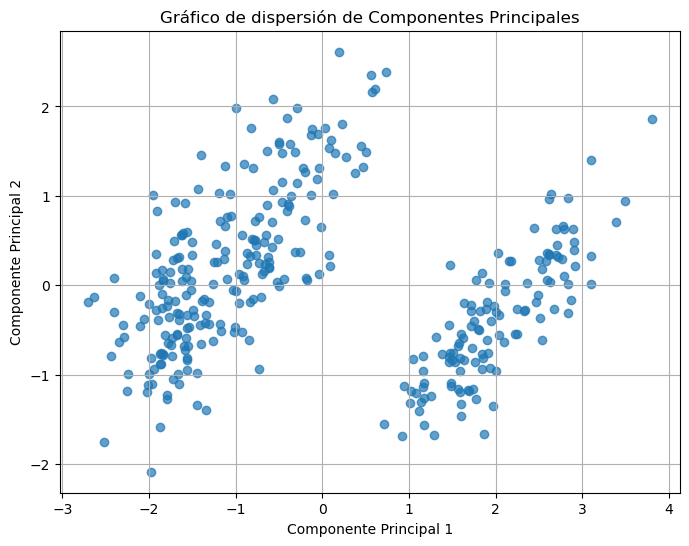

In [120]:
plt.figure(figsize=(8, 6))
plt.scatter(componentes_principales[:, 0], componentes_principales[:, 1], alpha=0.7)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Gráfico de dispersión de Componentes Principales')
plt.grid(True)
plt.show()

## INDICES

In [52]:
data_componentes_sup
datos

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
                  Componente 1  Componente 2
bill_length_mm_z         0.570724      0.275361
bill_depth_mm_z          0.441338      0.491654
flipper_length_mm_z      0.913672      0.000004
body_mass_g_z            0.828021      0.005498

In [230]:
#df_indice= data_componentes_sup[['bill_length_mm_z','bill_depth_mm_z'',flipper_length_mm_z','body_mass_g_z','Componente 1','Componente 2','species']]
df_concatenado = pd.concat([data_componentes_sup, datos['species']], axis=1)
df_concatenado['indice_t']=(
0.570724*df_concatenado['bill_length_mm_z']   + 0.275361 *df_concatenado['bill_length_mm_z']+
0.441338*df_concatenado['bill_depth_mm_z']    + 0.491654 *df_concatenado['bill_depth_mm_z']+
0.913672*df_concatenado['flipper_length_mm_z']+ 0.000004*df_concatenado['flipper_length_mm_z']+
0.828021*df_concatenado['body_mass_g_z']      + 0.005498 *df_concatenado['body_mass_g_z'])
df_concatenado['indice_t']=df_concatenado['indice_t']
df_concatenado








,bill_length_mm_z,bill_depth_mm_z,flipper_length_mm_z,body_mass_g_z,Componente 1,Componente 2,species,indice_t
0,-0.884499,0.785449,-1.418347,-0.564142,-1.843445,0.047702,Adelie,-1.781676
1,-0.811126,0.126188,-1.062250,-0.501703,-1.306762,-0.428348,Adelie,-1.957281
2,-0.664380,0.430462,-0.421277,-1.188532,-1.369181,-0.154476,Adelie,-1.536078
4,-1.324737,1.089724,-0.563715,-0.938776,-1.878827,-0.002048,Adelie,-1.401677
5,-0.847812,1.748985,-0.777373,-0.689020,-1.911748,0.829210,Adelie,-0.370111
...,...,...,...,...,...,...,...,...
338,0.601305,-1.750171,0.931890,0.903175,2.006436,-0.958909,Gentoo,0.480118
340,0.527932,-1.445897,1.003109,0.809516,1.840886,-0.767714,Gentoo,0.688929
341,1.188289,-0.735923,1.501644,1.933419,2.760742,0.288886,Gentoo,3.302341
342,0.234440,-1.192335,0.789451,1.246590,1.722364,-0.704269,Gentoo,0.846276


In [240]:
datos['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [241]:
especie = 'Chinstrap'  # Especie a filtrar
mask_especie = df_concatenado['species'] == especie
df_concatenado[mask_especie]

,bill_length_mm_z,bill_depth_mm_z,flipper_length_mm_z,body_mass_g_z,Componente 1,Componente 2,species,indice_t
152,0.472902,0.379750,-0.634935,-0.876337,-0.783009,0.509910,Chinstrap,-0.556149
153,1.114916,1.191149,-0.350057,-0.376825,-0.377562,1.583309,Chinstrap,1.420716
154,1.353378,1.039011,-0.563715,-0.689020,-0.502358,1.577483,Chinstrap,1.025098
155,0.271126,0.785449,-0.919812,-0.845118,-1.184257,0.715080,Chinstrap,-0.582618
156,1.610184,1.343286,-0.278838,-0.595362,-0.291808,1.982095,Chinstrap,1.864614
...,...,...,...,...,...,...,...,...
215,2.178824,1.343286,0.433355,-0.251947,0.565610,2.352188,Chinstrap,3.282689
216,-0.077396,0.481175,0.077258,-1.001215,-0.732380,0.253368,Chinstrap,-0.380494
217,1.041543,0.531887,-0.563715,-0.532923,-0.355706,0.999910,Chinstrap,0.418226
218,1.261662,0.937586,0.647013,-0.127069,0.502033,1.491983,Chinstrap,2.427479


In [271]:
especie = 'Adelie'  # Especie a filtrar
mask_especie = df_concatenado['species'] == especie
df_concatenado[mask_especie].mean()

bill_length_mm_z      -0.941108
bill_depth_mm_z        0.606109
flipper_length_mm_z   -0.780675
body_mass_g_z         -0.625754
Componente 1          -1.463897
Componente 2          -0.132909
indice_t              -1.465624
dtype: float64

In [56]:
especie = 'Adelie'  # Especie a filtrar
mask_especie = df_concatenado['species'] == especie
df_concatenado[mask_especie].describe()

,bill_length_mm_z,bill_depth_mm_z,flipper_length_mm_z,body_mass_g_z,Componente 1,Componente 2,indice_t
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,-0.941108,0.606109,-0.780675,-0.625754,-1.463897,-0.132909,-0.499251
std,0.488555,0.616992,0.465735,0.572648,0.549838,0.696810,0.855283
min,-2.168526,-0.837348,-2.059320,-1.688045,-2.703423,-2.086123,-2.637414
25%,-1.315565,0.176900,-1.062250,-1.063654,-1.839840,-0.618241,-1.088709
50%,-0.939528,0.633312,-0.777373,-0.626581,-1.570753,-0.154476,-0.563831
75%,-0.581835,0.937586,-0.421277,-0.251947,-1.102748,0.309337,0.142395
max,0.381186,2.205397,0.647013,0.715858,0.077074,1.985663,1.807829


In [104]:
#df_indice= data_componentes_sup[['bill_length_mm_z','bill_depth_mm_z'',flipper_length_mm_z','body_mass_g_z','Componente 1','Componente 2','species']]
df_concatenado2 = pd.concat([data_componentes_sup, datos['species']], axis=1)
df_concatenado2['indice_t'] = (
    20.725286 * df_concatenado['bill_length_mm_z'] +
    35.644619 * df_concatenado['bill_length_mm_z'] +
    33.179135 * df_concatenado['flipper_length_mm_z'] +
    0.000521 * df_concatenado['flipper_length_mm_z']
)

df_concatenado2['indice_t'] = df_concatenado2['indice_t'] / 100
df_concatenado2

,bill_length_mm_z,bill_depth_mm_z,flipper_length_mm_z,body_mass_g_z,Componente 1,Componente 2,species,indice_t
0,-0.884499,0.785449,-1.418347,-0.564142,-1.843445,0.047702,Adelie,-0.969194
1,-0.811126,0.126188,-1.062250,-0.501703,-1.306762,-0.428348,Adelie,-0.809682
2,-0.664380,0.430462,-0.421277,-1.188532,-1.369181,-0.154476,Adelie,-0.514288
4,-1.324737,1.089724,-0.563715,-0.938776,-1.878827,-0.002048,Adelie,-0.933792
5,-0.847812,1.748985,-0.777373,-0.689020,-1.911748,0.829210,Adelie,-0.735841
...,...,...,...,...,...,...,...,...
338,0.601305,-1.750171,0.931890,0.903175,2.006436,-0.958909,Gentoo,0.648153
340,0.527932,-1.445897,1.003109,0.809516,1.840886,-0.767714,Gentoo,0.630423
341,1.188289,-0.735923,1.501644,1.933419,2.760742,0.288886,Gentoo,1.168078
342,0.234440,-1.192335,0.789451,1.246590,1.722364,-0.704269,Gentoo,0.394091


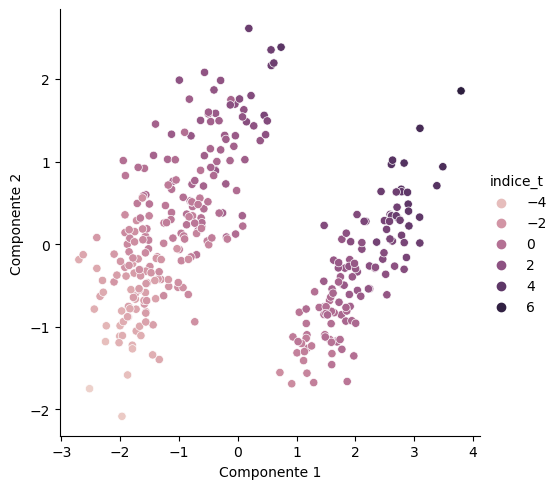

In [231]:
sns.relplot(x='Componente 1', y='Componente 2', hue= 'indice_t', data = df_concatenado)

-1.4656242076859771


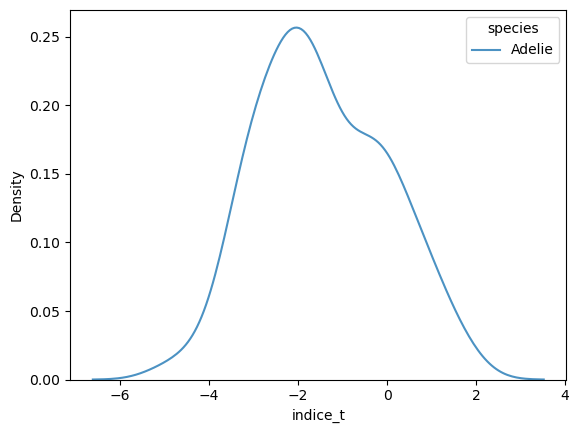

In [272]:
sns.kdeplot(data=df_concatenado[mask_especie], x="indice_t", hue="species",alpha=0.8,)
print(df_concatenado[mask_especie]['indice_t'].mean()) 

In [282]:
especie = 'Adelie'  # Especie a filtrar
mask_especie = df_concatenado['species'] == especie
ADELIE= df_concatenado[mask_especie]['indice_t'].mean()

In [283]:
espe=['Adelie', 'Chinstrap', 'Gentoo']
val=[ADELIE,CHINSTRAP,GENTOO]
df_species_indices = pd.DataFrame({'Species': espe, 'Value': val})


In [284]:
df_species_indices

,Species,Value
0,Adelie,-1.465624
1,Chinstrap,0.543791
2,Gentoo,1.498630


In [265]:
df_concatenado2 = pd.concat([data_componentes_sup, datos['species']], axis=1)
df_concatenado2['indice_t'] = (0.846084 * df_concatenado2['bill_length_mm_z'] +
                               0.932992 * df_concatenado2['bill_depth_mm_z'] +
                               0.913676 * df_concatenado2['flipper_length_mm_z'] +  # Corrected typo here
                               0.833519 * df_concatenado2['body_mass_g_z'])
df_concatenado2['indice_t'] = df_concatenado2['indice_t']  #

     

In [263]:
df_concatenado2

,bill_length_mm_z,bill_depth_mm_z,flipper_length_mm_z,body_mass_g_z,Componente 1,Componente 2,species,indice_t
0,-0.884499,0.785449,-1.418347,-0.564142,-1.843445,0.047702,Adelie,-1.781675
1,-0.811126,0.126188,-1.062250,-0.501703,-1.306762,-0.428348,Adelie,-1.957280
2,-0.664380,0.430462,-0.421277,-1.188532,-1.369181,-0.154476,Adelie,-1.536078
4,-1.324737,1.089724,-0.563715,-0.938776,-1.878827,-0.002048,Adelie,-1.401676
5,-0.847812,1.748985,-0.777373,-0.689020,-1.911748,0.829210,Adelie,-0.370110
...,...,...,...,...,...,...,...,...
338,0.601305,-1.750171,0.931890,0.903175,2.006436,-0.958909,Gentoo,0.480117
340,0.527932,-1.445897,1.003109,0.809516,1.840886,-0.767714,Gentoo,0.688928
341,1.188289,-0.735923,1.501644,1.933419,2.760742,0.288886,Gentoo,3.302339
342,0.234440,-1.192335,0.789451,1.246590,1.722364,-0.704269,Gentoo,0.846276


In [269]:
especie = 'Adelie'  # Especie a filtrar
mask_especie = df_concatenado2['species'] == especie
df_concatenado2[mask_especie].mean()

bill_length_mm_z      -0.941108
bill_depth_mm_z        0.606109
flipper_length_mm_z   -0.780675
body_mass_g_z         -0.625754
Componente 1          -1.463897
Componente 2          -0.132909
indice_t              -1.465623
dtype: float64

In [270]:
especie = 'Adelie'  # Especie a filtrar
mask_especie = df_concatenado['species'] == especie
df_concatenado[mask_especie].mean()

bill_length_mm_z      -0.941108
bill_depth_mm_z        0.606109
flipper_length_mm_z   -0.780675
body_mass_g_z         -0.625754
Componente 1          -1.463897
Componente 2          -0.132909
indice_t              -1.465624
dtype: float64

<Axes: xlabel='indice_t', ylabel='Density'>

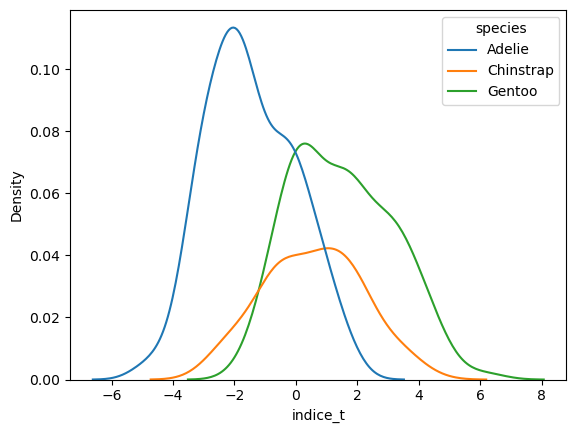

In [266]:
sns.kdeplot(data=df_concatenado2, x="indice_t", hue="species")

<Axes: xlabel='indice_t', ylabel='Density'>

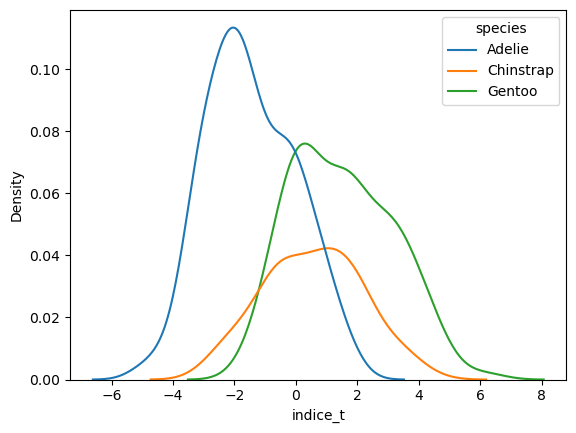

In [267]:
sns.kdeplot(data=df_concatenado, x="indice_t", hue="species")

## CLUSTERING


# Data sinestandarizar

In [57]:
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [58]:
from scipy.spatial import distance
# Calculate the pairwise Euclidean distances
distance_matrix = distance.cdist(data[numericas],data[numericas],'euclidean' )
# The distance_matrix is a 2D array containing the Euclidean
distance_small = distance_matrix [:5,:5]
# Index are added to the distance matrix
distance_small = pd.DataFrame ( distance_small , index = data.index[:5] , columns = data.index [:5])
distance_small_rounded = distance_small.round (2)
print("Distance Matrix fr:" ,distance_small_rounded )

Distance Matrix fr:         0       1       2       4       5
0    0.00   50.27  500.20  300.25  100.42
1   50.27    0.00  550.07  350.09  150.09
2  500.20  550.07    0.00  200.05  400.04
4  300.25  350.09  200.05    0.00  200.04
5  100.42  150.09  400.04  200.04    0.00


In [59]:
#plt.figure(figsize =(8 , 6))
#sns. heatmap ( distance_matrix , cmap ="YlGnBu", annot = False, fmt =".1f")
#plt . show ()

In [60]:
## Perform hierarchical clustering to get the linkage matrix
#linkage = sns . clustermap ( distance_matrix , fmt =".1f",annot = False, cmap ="YlGnBu" , method ='average'). dendrogram_row . linkage
## Reorder the data based on the hierarchical clustering
#order = pd . DataFrame ( linkage , columns =[' cluster_1' , 'cluster_2', 'distance ', 'new_count' ]) . index
#reordered_data = data.reindex ( index = order , columns = order )
## Optionally , you can add color bar
#sns . heatmap ( reordered_data , fmt =".1f" ,cmap ="YlGnBu", cbar =False )
#plt . show ()

In [61]:
data_standarizada

,bill_length_mm_z,bill_depth_mm_z,flipper_length_mm_z,body_mass_g_z
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532
4,-1.324737,1.089724,-0.563715,-0.938776
5,-0.847812,1.748985,-0.777373,-0.689020
...,...,...,...,...
338,0.601305,-1.750171,0.931890,0.903175
340,0.527932,-1.445897,1.003109,0.809516
341,1.188289,-0.735923,1.501644,1.933419
342,0.234440,-1.192335,0.789451,1.246590


In [62]:
# Calculate the pairwise Euclidean distances
numstd = ['bill_length_mm_z','bill_depth_mm_z','flipper_length_mm_z','body_mass_g_z']

distance_std = distance.cdist(data_standarizada[numstd] , data_standarizada[numstd],'euclidean')
print ( distance_std [:5 ,:5]. round (2) )


[[0.   0.76 1.25 1.08 1.16]
 [0.76 0.   1.   1.28 1.66]
 [1.25 1.   0.   0.98 1.47]
 [1.08 1.28 0.98 0.   0.88]
 [1.16 1.66 1.47 0.88 0.  ]]


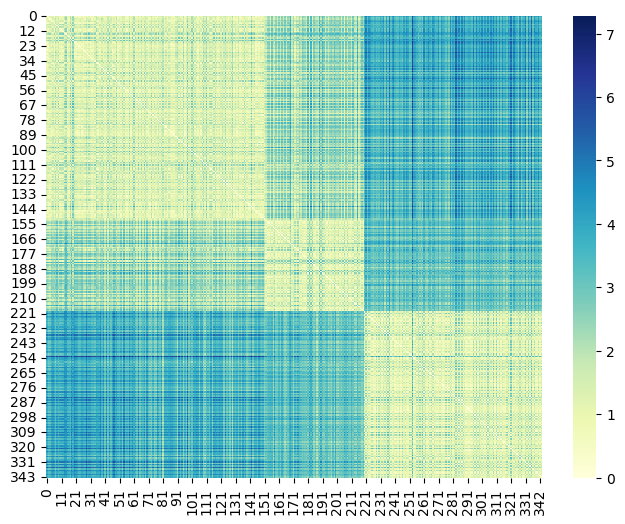

In [63]:
plt . figure ( figsize =(8 , 6) )
df_std_distance = pd . DataFrame ( distance_std, index = data_standarizada.index ,columns = data.index )
sns.heatmap ( df_std_distance , annot = False , cmap ="YlGnBu", fmt =".1f")
plt.show ()

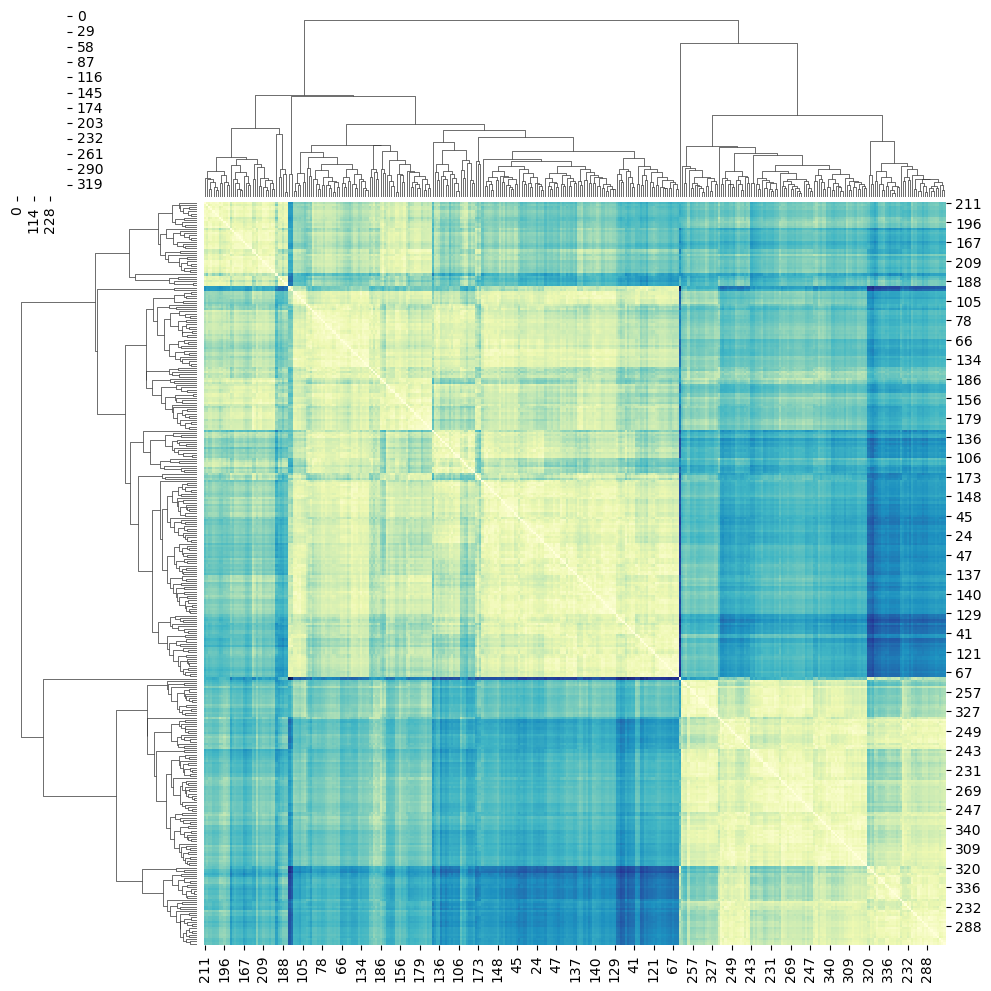

In [64]:
# Perform hierarchical clustering to get the linkage matrix
linkage = sns . clustermap ( distance_std , fmt =".1f",annot = False, cmap ="YlGnBu" , method ='average'). dendrogram_row . linkage
# Reorder the data based on the hierarchical clustering
order = pd . DataFrame ( linkage , columns =[' cluster_1' , 'cluster_2', 'distance ', 'new_count' ]) . index
reordered_data = data_standarizada.reindex ( index = order , columns = order )
# Optionally , you can add color bar
sns . heatmap ( reordered_data , fmt =".1f" ,cmap ="YlGnBu", cbar =False )
plt . show ()

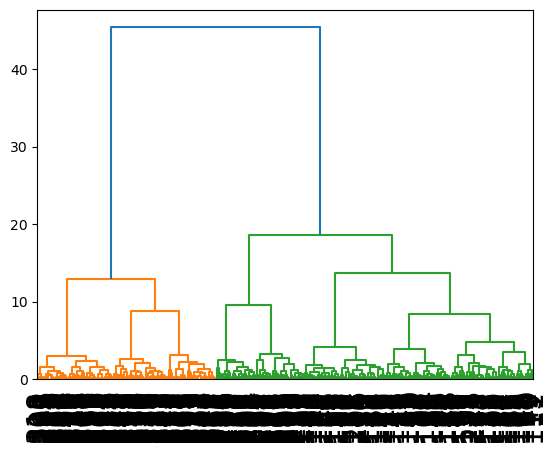

In [124]:
import scipy . cluster . hierarchy as sch
import matplotlib . pyplot as plt
# Calculate the linkage matrix
linkage_matrix = sch.linkage(data_standarizada, method='ward')  # You can choose a different linkage method if needed

# Create the dendrogram
dendrogram = sch.dendrogram(linkage_matrix, labels=data_standarizada.index, leaf_font_size=8, leaf_rotation=90)

# Display the dendrogram
plt.show()

In [122]:
dendrogram 

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [5.0, 5.0, 23.75, 23.75],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [85.0, 85.0, 95.0, 95.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [90.0, 90.0, 112.5, 112.5],
  [62.5, 62.5, 101.25, 101.25],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [195.0, 195.0, 205.0, 205.0],
  [180.0, 180.0, 200.0, 200.0],
  [160.0, 160.0, 190.0, 190.0],
  [215.0, 215.0, 225.0, 225.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [220.0, 220.0, 242.5, 242.5],
  [175.0, 175.0, 231.25, 231.25],
  [140.0, 140.0, 203.125, 203.125],
  [81.875, 81.875, 171.5625, 171.5625],
  [14.375, 14.375, 126.71875, 126.71875],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [272.5, 272.5, 302.5, 302.5],
  [325.0, 325.0, 335.0, 335.0],
  [3

In [66]:
# Assign data points to 4 clusters
num_clusters = 4
cluster_assignments = sch.fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Display the cluster assignments
print("Cluster Assignments:", cluster_assignments)

# Display the dendrogram
plt.show()

Cluster Assignments: [4 4 4 4 3 4 3 4 3 4 4 4 3 3 4 4 3 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 4
 4 3 4 3 4 3 4 3 4 4 4 3 4 3 4 3 4 3 4 3 4 4 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 4 4 3 4 3 4 4 4 3 4 4 4 4 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 4 4 3 4 3 4 3
 4 3 3 3 4 3 4 4 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 4 4 3 4 3 4 4 4 4 4 4 3 4 4
 4 4 3 2 2 2 2 2 2 4 2 3 2 2 2 2 2 2 2 2 2 2 2 4 2 4 2 2 2 2 2 2 2 4 2 4 2
 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 4 2 2 3 2 2 2 2 3 2 2 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]


In [67]:
# Create a new column 'Ncluster' and assign the 'cluster_assignments' values to it
data_standarizada['NCluster'] = cluster_assignments

In [68]:
#data_standarizada.drop('label', axis=1, inplace=True)

In [69]:
data_standarizada

,bill_length_mm_z,bill_depth_mm_z,flipper_length_mm_z,body_mass_g_z,NCluster
0,-0.884499,0.785449,-1.418347,-0.564142,4
1,-0.811126,0.126188,-1.062250,-0.501703,4
2,-0.664380,0.430462,-0.421277,-1.188532,4
4,-1.324737,1.089724,-0.563715,-0.938776,4
5,-0.847812,1.748985,-0.777373,-0.689020,3
...,...,...,...,...,...
338,0.601305,-1.750171,0.931890,0.903175,1
340,0.527932,-1.445897,1.003109,0.809516,1
341,1.188289,-0.735923,1.501644,1.933419,1
342,0.234440,-1.192335,0.789451,1.246590,1


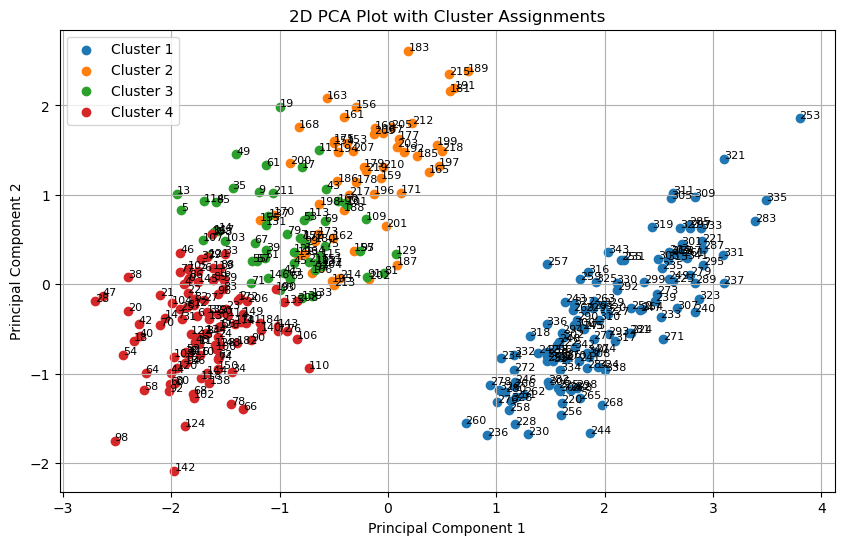

In [70]:
# Assuming 'df' is your original DataFrame with data
# 'cluster_assignments' contains cluster assignments
# Step 1: Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_standarizada[numstd])

# Create a new DataFrame for the 2D principal components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Step 2: Create a scatter plot with colors for clusters
plt.figure(figsize=(10, 6))

# Loop through unique cluster assignments and plot data points with the same color
for cluster in np.unique(cluster_assignments):
    plt.scatter(df_pca.loc[cluster_assignments == cluster, 'PC1'],
                df_pca.loc[cluster_assignments == cluster, 'PC2'],
                label=f'Cluster {cluster}')
# Add labels to data points
for i, row in df_pca.iterrows():
    plt.text(row['PC1'], row['PC2'], str(data.index[i]), fontsize=8)

plt.title("2D PCA Plot with Cluster Assignments")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()

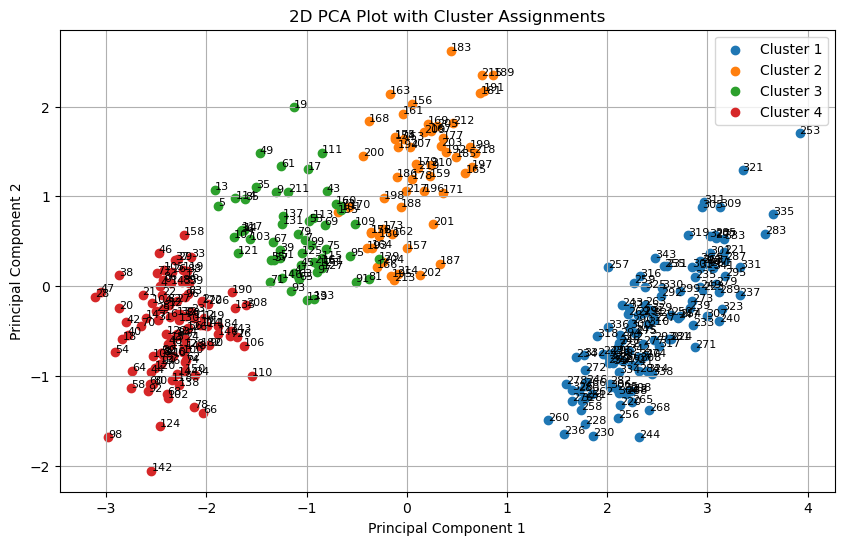

In [71]:
# Assuming 'df' is your original DataFrame with data
# 'cluster_assignments' contains cluster assignments
# Step 1: Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_standarizada)

# Create a new DataFrame for the 2D principal components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Step 2: Create a scatter plot with colors for clusters
plt.figure(figsize=(10, 6))

# Loop through unique cluster assignments and plot data points with the same color
for cluster in np.unique(cluster_assignments):
    plt.scatter(df_pca.loc[cluster_assignments == cluster, 'PC1'],
                df_pca.loc[cluster_assignments == cluster, 'PC2'],
                label=f'Cluster {cluster}')
# Add labels to data points
for i, row in df_pca.iterrows():
    plt.text(row['PC1'], row['PC2'], str(data.index[i]), fontsize=8)

plt.title("2D PCA Plot with Cluster Assignments")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()

In [144]:
data_standarizada[numstd]

,bill_length_mm_z,bill_depth_mm_z,flipper_length_mm_z,body_mass_g_z
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532
4,-1.324737,1.089724,-0.563715,-0.938776
5,-0.847812,1.748985,-0.777373,-0.689020
...,...,...,...,...
338,0.601305,-1.750171,0.931890,0.903175
340,0.527932,-1.445897,1.003109,0.809516
341,1.188289,-0.735923,1.501644,1.933419
342,0.234440,-1.192335,0.789451,1.246590


In [174]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
# Set the number of clusters (k=4)
k = 4

# Initialize the KMeans model
kmeans = KMeans(n_clusters=k, random_state=0)

# Fit the KMeans model to your standardized data
kmeans.fit(data_standarizada[numstd])

# Get the cluster labels for your data
kmeans_cluster_labels = kmeans.labels_

print(kmeans_cluster_labels)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 3 1 3
 1 1 3 3 1 3 3 3 1 3 1 3 1 3 1 3 1 1 3 3 3 3 3 3 1 3 1 1 3 3 1 1 1 3 1 3 1
 3 1 3 3 1 3 3 1 3 1 3 1 3 1 3 3 3 3 3 1 3 1 3 1 3 1 3 1 3 1 3 1 1 3 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 1 3 3 1 3 1 3 1 3 1 3 1 3 1 1 1 3 1
 3 1 3 1 3 3 1 3 1]


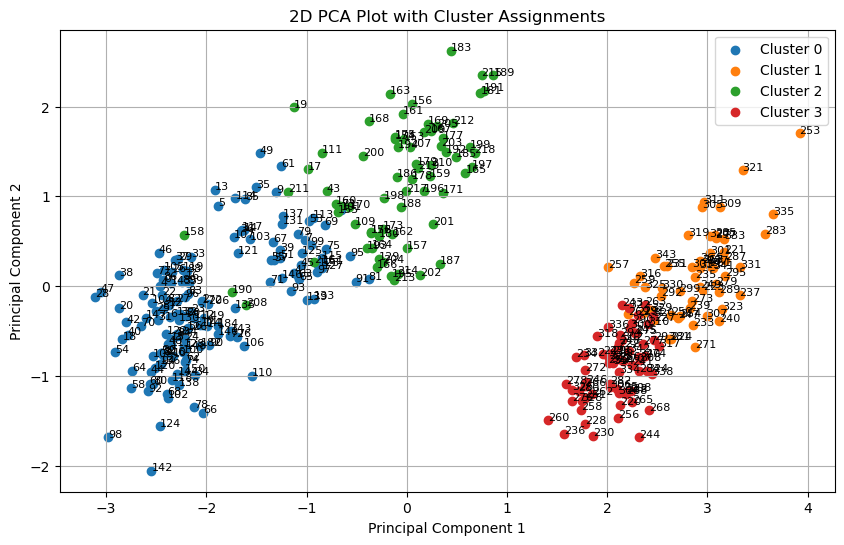

In [175]:
# Step 2: Create a scatter plot with colors for clusters
plt.figure(figsize=(10, 6))

# Loop through unique cluster assignments and plot data points with the same color
for cluster in np.unique(kmeans_cluster_labels):
    plt.scatter(df_pca.loc[kmeans_cluster_labels == cluster, 'PC1'],
                df_pca.loc[kmeans_cluster_labels == cluster, 'PC2'],
                label=f'Cluster {cluster}')
# Add labels to data points
for i, row in df_pca.iterrows():
    plt.text(row['PC1'], row['PC2'], str(data_standarizada.index[i]), fontsize=8)

plt.title("2D PCA Plot with Cluster Assignments")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()

In [176]:
#Create an array to store the WCSS values for different values of K:
wcss = []

for k in range(1, 11):  # You can choose a different range of K values
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_standarizada[numstd])
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS value

In [177]:
wcss

[1368.0000000000002,
 565.7076453796292,
 379.3925027555175,
 302.1178688594354,
 232.60489541912895,
 204.39259957010316,
 187.0364967552812,
 171.50340889659995,
 159.4259911194433,
 149.42463393136703]

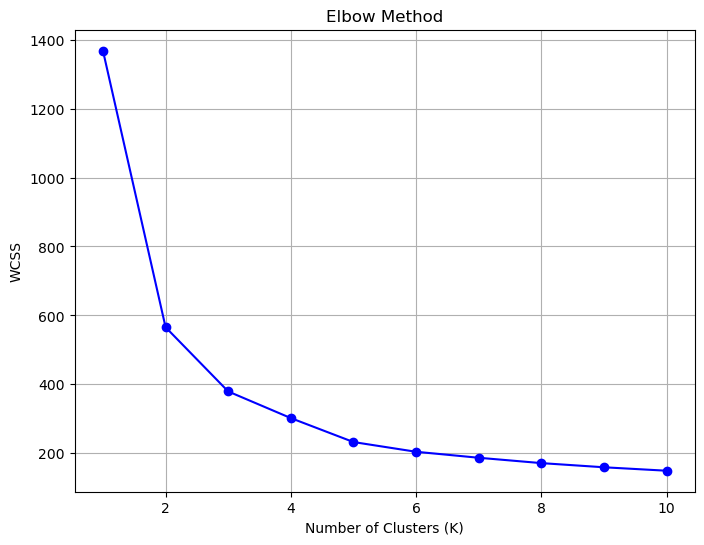

In [171]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

[0.5315403219473027, 0.44665265674713067, 0.38952555207765455, 0.33281469559672144, 0.3130190905313351, 0.28424472890580027, 0.28210818610709515, 0.285397462750625, 0.2712583641879612]


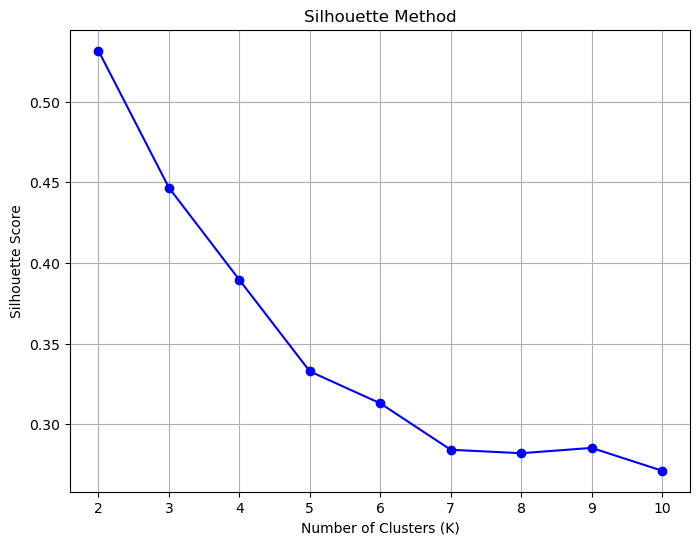

In [179]:
#Create an array to store silhouette scores for different values of K

silhouette_scores = []

#Run K-means clustering for a range of K values and calculate the silhouette score for each K:

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_standarizada)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(data_standarizada[numstd], labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.show()

In [180]:
silhouette_scores

[0.5315403219473027,
 0.44665265674713067,
 0.38952555207765455,
 0.33281469559672144,
 0.3130190905313351,
 0.28424472890580027,
 0.28210818610709515,
 0.285397462750625,
 0.2712583641879612]

In [183]:
# Assuming 'df_std_distance' is your standardized data and '4' is the optimal number of clusters
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(data_standarizada)
labels = kmeans.labels_

In [184]:
silhouette_values = silhouette_samples(data_standarizada, labels)
silhouette_values

array([ 0.29530675,  0.37112968,  0.33495345,  0.35292809,  0.43559207,
        0.0768315 ,  0.4519238 ,  0.13155492,  0.38402372,  0.57419532,
        0.41606998,  0.46113704,  0.42748378,  0.38586446,  0.13980206,
        0.36184234,  0.25711432,  0.05435327,  0.01203095, -0.00535218,
        0.21391672,  0.40528368,  0.30789954,  0.38434667,  0.34057504,
        0.24604522,  0.44846882,  0.03784563,  0.33468957,  0.50809089,
        0.16143021,  0.47844014,  0.39521715,  0.45692893,  0.42896799,
        0.50393971,  0.16405425,  0.18912241,  0.40330788,  0.44607282,
        0.4281126 ,  0.02580418,  0.15338081,  0.56767457,  0.44492538,
        0.22975952, -0.00766318,  0.10584813,  0.29639873,  0.45360204,
        0.47331047,  0.08490935,  0.34284645,  0.38829869,  0.38459775,
        0.47704054,  0.45754275,  0.52289758,  0.45407328,  0.548448  ,
        0.32969442,  0.50442142,  0.4134556 ,  0.52741293,  0.35491547,
        0.44677132,  0.4785727 ,  0.53566696,  0.35368796,  0.25

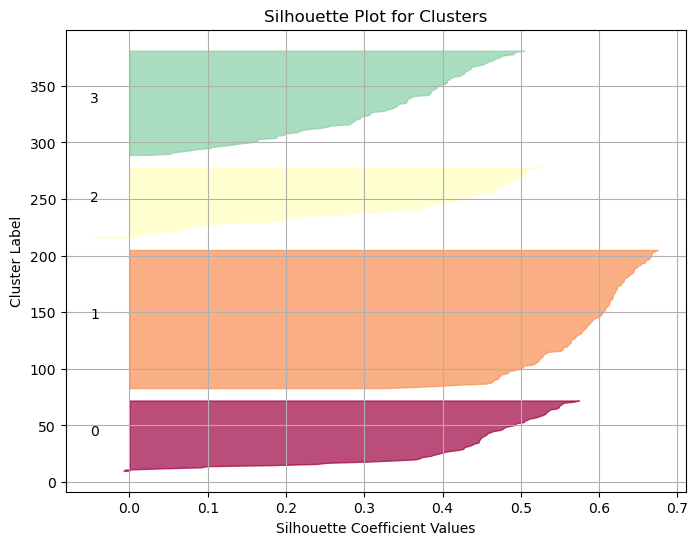

In [192]:
plt.figure(figsize=(8, 6))

y_lower = 10
for i in range(4):
    ith_cluster_silhouette_values = silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.get_cmap("Spectral")(float(i) / 4)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.title("Silhouette Plot for Clusters")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")
plt.grid(True)
plt.show()

In [193]:
data_standarizada

,bill_length_mm_z,bill_depth_mm_z,flipper_length_mm_z,body_mass_g_z,NCluster
0,-0.884499,0.785449,-1.418347,-0.564142,3
1,-0.811126,0.126188,-1.062250,-0.501703,0
2,-0.664380,0.430462,-0.421277,-1.188532,0
4,-1.324737,1.089724,-0.563715,-0.938776,3
5,-0.847812,1.748985,-0.777373,-0.689020,3
...,...,...,...,...,...
338,0.601305,-1.750171,0.931890,0.903175,1
340,0.527932,-1.445897,1.003109,0.809516,1
341,1.188289,-0.735923,1.501644,1.933419,1
342,0.234440,-1.192335,0.789451,1.246590,1


In [194]:
# Add the labels as a new column to the DataFrame
data_standarizada['NCluster'] = labels
# Sort the DataFrame by the "label" column
datos_estandarizados_sort = data_standarizada.sort_values(by="NCluster")
# Set the 'A' column as the index
datos_estandarizados_sort['NCluster']

56     0
138    0
140    0
72     0
141    0
      ..
100    3
101    3
104    3
90     3
0      3
Name: NCluster, Length: 342, dtype: int32

,bill_length_mm_z,bill_depth_mm_z,flipper_length_mm_z,body_mass_g_z
NCluster,,,,
0,-1.000964,0.002224,-1.010249,-1.124607
1,0.657229,-1.099980,1.158865,1.091761
2,0.995539,0.779010,-0.273186,-0.454130
3,-0.865564,0.925590,-0.663269,-0.374475


In [205]:
# Group the data by the 'label' column and calculate the mean of each group
cluster_centroids = datos_estandarizados_sort.groupby('NCluster').mean()
cluster_centroids.round(2)
# 'cluster_centroids' now contains the centroids of each cluster

,bill_length_mm_z,bill_depth_mm_z,flipper_length_mm_z,body_mass_g_z
NCluster,,,,
0,-1.00,0.00,-1.01,-1.12
1,0.66,-1.10,1.16,1.09
2,1.00,0.78,-0.27,-0.45
3,-0.87,0.93,-0.66,-0.37


In [ ]:
	
NCluster bill_length_mm_z	bill_depth_mm_z	flipper_length_mm_z	body_mass_g_z
0	-1.00	0.00	-1.01	-1.12
1	0.66	-1.10	1.16	1.09
2	1.00	0.78	-0.27	-0.45
3	-0.87	0.93	-0.66	-0.37

In [198]:
# Add the labels as a new column to the DataFrame
data_standarizada['NCluster'] = labels
# Sort the DataFrame by the "label" column
df_sort = data_standarizada.sort_values(by="NCluster")

# Group the data by the 'label' column and calculate the mean of each group
cluster_centroids_orig = df_sort.groupby('NCluster').mean()
cluster_centroids_orig.round(2)
# 'cluster_centroids' now contains the centroids of each cluster

,bill_length_mm_z,bill_depth_mm_z,flipper_length_mm_z,body_mass_g_z
NCluster,,,,
0,-1.00,0.00,-1.01,-1.12
1,0.66,-1.10,1.16,1.09
2,1.00,0.78,-0.27,-0.45
3,-0.87,0.93,-0.66,-0.37


In [201]:
# Add the labels as a new column to the DataFrame
data_standarizada['NCluster'] = labels
# Sort the DataFrame by the "label" column
df_sort = data_standarizada.sort_values(by="NCluster")
df_sort

,bill_length_mm_z,bill_depth_mm_z,flipper_length_mm_z,body_mass_g_z,NCluster
56,-0.902842,0.176900,-1.062250,-0.813898,0
138,-1.269707,-0.330224,-1.133470,-1.001215,0
140,-0.682723,-0.025949,-0.563715,-1.001215,0
72,-0.792782,0.024763,-0.350057,-0.813898,0
141,-0.609350,0.024763,-0.991031,-0.907557,0
...,...,...,...,...,...
100,-1.636572,0.379750,-0.634935,-0.595362,3
101,-0.535977,1.444711,0.148478,0.653419,3
104,-1.104618,0.734737,-0.563715,-1.594386,3
90,-1.508169,0.430462,0.077258,-0.813898,3


In [ ]:
## Group the data by the ’label ’ column and calculate the mean
#of each group
#cluster_centroids = df_std_sort . groupby (’label ’). mean ()
#cluster_centroids . round (2)
## ’ cluster_cen

In [ ]:
## Add the labels as a new column to the DataFrame
#df [’label ’] = labels
## Sort the DataFrame by the " label " column
#df_sort = df . sort_values ( by =" label ")
## Group the data by the ’label ’ column and calculate the mean of
#each group
#cluster_centroids_orig = df_sort . groupby (’label ’). mean ()
#cluster_centroids_orig . round (2)
## ’ cluster_centroids ’ now contains the centroids of each cluster
